Eigenvector => after affine xformation Av has same direction as v <br>
Eigenvalue => scalar (lambda) , so that after affine transformation Av = (lambda)v

In [1]:
import numpy as np

In [11]:
# Function to plot 1 or more Range 1 Tensors (vectors) in a 2D plane
import matplotlib.pyplot as plt

def plot_vectors(vectors, colours, xlim, ylim):
   # vecors : list of lists/arrays
   # colours : list of colours of vectors on the plt
   # xlim : xlimits tuple
   # ylim : ylimits tuple
   plt.figure()
   plt.axvline(x=0, color='black')
   plt.axhline(y=0, color='black')
   plt.xlim(xlim[0],xlim[1])
   plt.ylim(ylim[0],ylim[1])

   for i in range(len(vectors)) :
      x = np.concatenate([[0,0], vectors[i]])
      print(x)
      plt.quiver([x[0]] , [x[1]] , [x[2]] , [x[3]],
                  angles='xy', scale_units='xy', scale=1, color=colours[i])

In [2]:
A = np.array([[-1,4],[2,-2]])
A

array([[-1,  4],
       [ 2, -2]])

In [5]:
# .eig returns a tuple with
# vector of eigenvalues
# Matrix of eigenvectors
lambdas, V = np.linalg.eig(A)

print(lambdas)
print(V)

[ 1.37228132 -4.37228132]
[[ 0.86011126 -0.76454754]
 [ 0.51010647  0.64456735]]


In [22]:
# Confirm Av = (lambda) v for first vector
v = V[:,0]
lambda_0 = lambdas[0]

Av = np.matmul(A,v)
Av ==np.dot(lambda_0,v)


array([ True,  True])

[0.         0.         1.18031462 0.70000958]
[0.         0.         0.86011126 0.51010647]


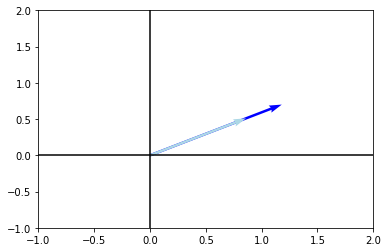

In [23]:
plot_vectors([Av,v],['blue','lightblue'],(-1,2),(-1,2))

In [24]:
# Confirm Av = (lambda) v for second vector
v2 = V[:,1]
lambda_1 = lambdas[1]

Av2 = np.matmul(A,v2)
Av2 ==np.dot(lambda_1,v2)

array([ True,  True])

[0.         0.         1.18031462 0.70000958]
[0.         0.         0.86011126 0.51010647]
[ 0.          0.          3.34281692 -2.81822977]
[ 0.          0.         -0.76454754  0.64456735]


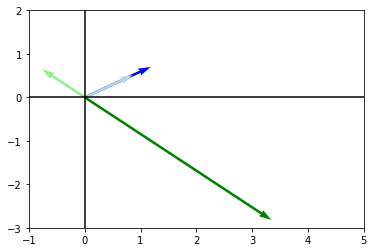

In [26]:
plot_vectors([Av,v,Av2,v2],['blue','lightblue','green','lightgreen'],(-1,5),(-3,2))

### Using torch

In [27]:
import torch

In [30]:
A_p = torch.tensor([[-1,4],[2,-2]], dtype=torch.float)
A_p

tensor([[-1.,  4.],
        [ 2., -2.]])

In [33]:
eigens = torch.linalg.eig(A_p)
eigens

torch.return_types.linalg_eig(
eigenvalues=tensor([ 1.3723+0.j, -4.3723+0.j]),
eigenvectors=tensor([[ 0.8601+0.j, -0.7645+0.j],
        [ 0.5101+0.j,  0.6446+0.j]]))

In [36]:
v_e_p = eigens.eigenvectors   
v_e_p

tensor([[ 0.8601+0.j, -0.7645+0.j],
        [ 0.5101+0.j,  0.6446+0.j]])

In [37]:
lambda_e_p = eigens.eigenvalues
lambda_e_p

tensor([ 1.3723+0.j, -4.3723+0.j])

In [46]:
# Check first set
v1_p = v_e_p[:,0].real
lambda_1_p = lambda_e_p[0].real
print(v1_p)
print(lambda_1_p)

Av1_p = torch.matmul(A_p,v1_p)
lambda_1_pXv1_p = lambda_1_p * v1_p
print(Av1_p)
print(lambda_1_pXv1_p)



tensor([0.8601, 0.5101])
tensor(1.3723)
tensor([1.1803, 0.7000])
tensor([1.1803, 0.7000])


In [47]:
# Check second set
v2_p = v_e_p[:,1].real
lambda_2_p = lambda_e_p[1].real
print(v2_p)
print(lambda_2_p)

Av2_p = torch.matmul(A_p,v2_p)
lambda_2_pXv2_p = lambda_2_p * v2_p
print(Av2_p)
print(lambda_2_pXv2_p)

tensor([-0.7645,  0.6446])
tensor(-4.3723)
tensor([ 3.3428, -2.8182])
tensor([ 3.3428, -2.8182])


[0.         0.         1.18031454 0.70000958]
[0.         0.         0.86011124 0.51010644]
[ 0.          0.          3.34281683 -2.81822968]
[ 0.          0.         -0.76454753  0.64456731]


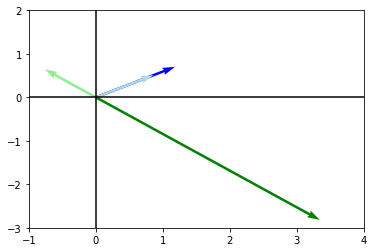

In [48]:
plot_vectors([Av1_p.numpy(),v1_p.numpy(),Av2_p.numpy(),v2_p.numpy()],['blue','lightblue','green','lightgreen'],(-1,4),(-3,2))